##**✨Morales Martínez María Esthela✨**

###Actividad final

Las personas con enfermedad cardiovascular o que tienen un alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y gestión tempranas en las que un modelo de aprendizaje automático puede ser de gran ayuda. Realizaremos un modelo de entrenamiento para poder realizar predicciones con la ayuda de este conjunto de datos

##Importar librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

##Leemos el conjunto de datos

In [ ]:
data = pd.read_csv("/content/heart.csv")

##Análisis exploratorio de los datos

Analizaremos un poco el dataset para darnos un mejor entendimiento sobre el conjunto de datos que estaremos manipulando.

In [ ]:
#Obtendremos los primeros 5 registros del dataset
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Usamos la función info() para obtener un pequeño resumen sobre los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#Verificamos si hay valores nulos en algún registro
data.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


##Label Encoder
Para poder manipular el conjunto de datos, es necesario que escalemos las variables que son categóricas a un valor numérico.

In [ ]:
le = LabelEncoder()
#Escalamos las variables categóricas
data.Sex = le.fit_transform(data.Sex)
data.ChestPainType = le.fit_transform(data.ChestPainType)
data.RestingECG = le.fit_transform(data.RestingECG)
data.ExerciseAngina = le.fit_transform(data.ExerciseAngina)
data.ST_Slope = le.fit_transform(data.ST_Slope)

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
#Separamos el dataset para obtener las columna target y las de entrenamiento
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [ ]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [ ]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

##Definimos los modelos a utilizar
Partimos el conjunto de datos para obtener las muestras necesarias para el conjunto de entrenamiento y el de prueba.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#entrenamos el modelo knn
knn_model = KNeighborsClassifier(n_neighbors=31)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=31)

In [ ]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
#Entrenamos el modelo de árbol de decisión
Decision_model = DecisionTreeClassifier()
Decision_model = DecisionTreeClassifier(criterion="gini")
Decision_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predd = Decision_model.predict(X_test)
y_predd

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1])

##Matriz de confusión
Graficamos la matriz de confusión para cada modelo entrenado con el objetivo de ver las predicciones que realizó cada modelo

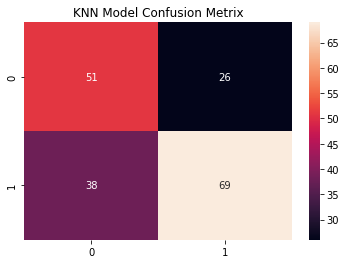

In [ ]:
#Matriz de confusión para modelo KNN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
plt.title('KNN Model Confusion Metrix')
sns.heatmap(cm, annot = True)

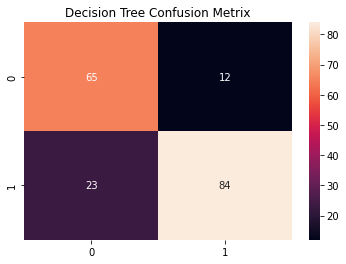

In [ ]:
#Matriz de confusión para modelo Decision Tree
cm = confusion_matrix(y_test, y_predd)
plt.title('Decision Tree Confusion Metrix')
sns.heatmap(cm, annot = True)

##Comparación de resultados
Realizamos un reporte de clasificación para ver cómo trabajó cada modelo. 

###**KNN**
Podemos ver que el modelo knn tiene un fscore de **0.61** para predecir si un paciente no corre el riesgo de una enfermedad cardiovascular, y un **0.68** para predecir que sí corre el riesgo. En general cuenta con un accuracy de **0.65**

###**Decision Tree**
Por otro lado el árbol de decisión tiene un fscore de **0.79** para predecir que un paciente sí corre el riesgo de una enfermedad cardiovascular, y un **0.83** para predecir que no corre el riesgo, teniendo un accuracy de **0.81**

In [ ]:
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_predd))

              precision    recall  f1-score   support

           0       0.57      0.66      0.61        77
           1       0.73      0.64      0.68       107

    accuracy                           0.65       184
   macro avg       0.65      0.65      0.65       184
weighted avg       0.66      0.65      0.65       184

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        77
           1       0.88      0.79      0.83       107

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184



Tomando en cuenta los valores que nos arroja el reporte, podemos comprobar que el modelo del árbol de decisión trabajó mejor que el modelo de vecinos cercanos, con una diferencia significativa tanto de fscore como de accuracy.